In [ ]:
import math # 수학 패키지
import torch # 파이토치 모듈
import matplotlib.pyplot as plt # 시각화
import numpy as np # 넘파이
import pandas as pd # 판다스
import torch.nn as nn
import torch.optim as optim

In [ ]:
# 디바이스 할당
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
import torchvision.datasets as datasets

# 다운로드 받을 디렉터리명
data_root = './data'

train_set0 = datasets.MNIST(
    # 원본 데이터를 다운로드 받을 디렉터리 지정
    root = data_root,
    # 훈련 데이터인지 또는 검증 데이터인지
    train = True,
    # 원본 데이터가 없는 경우, 다운로드를 실행하는지 여부
    download = True
)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


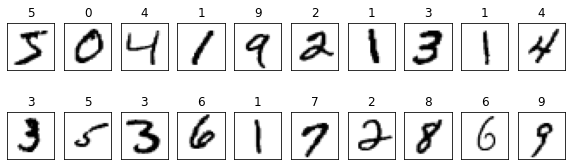

In [ ]:
# 정답 데이터와 함께 처음 20개 데이터를 이미지로 출력

plt.figure(figsize=(10,3))
for i in range(20):
  ax = plt.subplot(2,10,i+1)

  # image와 label 취득
  image,label = train_set0[i]

  # 이미지 출력
  plt.imshow(image, cmap='gray_r')
  ax.set_title(f'{label}')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

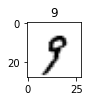

In [ ]:
# 입력 데이터를 이미지로 출력
plt.figure(figsize=(1,1))
plt.title(f'{label}')
plt.imshow(image)
plt.imshow(image, cmap='gray_r')
# plt.axis('off')
plt.show()

In [ ]:
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform1
)

In [ ]:
# 변환 결과 확인

image, label = train_set2[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


In [ ]:
image

In [ ]:
transform2 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),

    # 데이터 정규화
    transforms.Normalize(0.5,0.5),

    # 현재 텐서를 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set2 = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform2
)

In [ ]:
# 데이터 입수를 위한 Dataset 함수

# 훈련용 데이터셋 정의
train_set = datasets.MNIST(
    root = data_root,
    train = True,
    download = True,
    transform = transform2
)
# 검증용 데이터셋 정의
test_set = datasets.MNIST(
    root = data_root,
    train = False,
    download = True,
    transform = transform2
)

In [ ]:
# 라이브러리 임포트
from torch.utils.data import DataLoader

# 미니 배치 사이즈 지정
batch_size = 500

# 훈련용 데이터로더
# 훈련용이므로, 셔플을 적용함
train_loader = DataLoader(
    train_set,
    batch_size = batch_size,
    shuffle = True
)

# 검증용 데이터로더
# 검증시에는 셔플을 필요로 하지 않음
test_loader = DataLoader(
    test_set,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader))

# 데이터로더로부터 가장 처음 한 세트를 가져옴
for imaages,labels in train_loader:
  break
print(image.shape)
print(labels.shape)

120
torch.Size([784])
torch.Size([500])


In [ ]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(labels.unique())

# 은닉층의 노드 수
n_hidden = 128

In [ ]:
# 모델 정의
# 784입력 10출력 1은닉층의 신경망 모델

class Net(nn.Module):
  def __init__(self,n_input,n_output,n_hidden):
    super().__init__()

    # 은닉층 정의(은닉층 노드 수 : n_hidden)
    self.l1 = nn.Linear(n_input,n_hidden)

    #출력층 정의
    self.l2 = nn.Linear(n_hidden,n_output)

    # ReLU 함수 정의
    self.relu = nn.ReLU(inplace=True)

  def forward(self,x):
    x1 = self.l1(x)
    x2 = self.relu(x1)
    x3 = self.l2(x2)
    return x3

In [ ]:
# 난수 고정
torch.cuda.manual_seed(123)
torch.backends.cudnn.deteministic = True
torch.use_deterministic_algorithms = True

# 학습률
lr = 0.01

# 모델 초기화
net = Net(n_input, n_output, n_hidden).to(device)

# 손실함수 : 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

# 최적화 함수 : 경사 하강법
optimizer = optim.Adam(net.parameters(), lr=lr)

# 반복 횟수
num_epochs = 100

# 평가 결과 기록
history = np.zeros((0,5))

In [ ]:
# 모델 내부 파라미터 확인
# l1.weight, l1.bias, l2.weight, l2.bias를 확인할 수 있음

for parameter in net.named_parameters():
  print(parameter)

In [ ]:
# 모델 개요 표시 1
print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [ ]:
!pip install torchinfo | tail -n 1

In [ ]:
from torchinfo import summary

In [ ]:
# 모델 개요 표시 2
summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

In [ ]:
n_train = 0, 0
# tqdm 라이브러리 임포트
from tqdm.notebook import tqdm
#훈련 페이즈
for inputs, labels in tqdm(train_loader):
  n_train += len(labels)

  0%|          | 0/120 [00:00<?, ?it/s]

TypeError: ignored

In [ ]:
# 반복 계산 메인 루프
for epoch in range(5):
  train_acc, train_loss = 0,0
  val_acc, val_loss = 0, 0
  n_train, n_test = 0, 0

  #훈련 페이즈
  for inputs, labels in tqdm(train_loader):
    n_train += len(labels)

    # GPU로 전송
    inputs = inputs.to(device)
    labels = labels.to(device)

    # 경사 초기화
    optimizer.zero_grad()

    # 예측 계산
    outputs = net(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 예측 라벨 산출
    predicted = outputs.max(axis=1)[1]

    # 손실과 정확도 계산
    train_loss += loss.item()
    train_acc += (predicted == labels).sum().item()
  # 예측 페이즈
  for inputs_test, labels_test in test_loader:
    n_test += len(labels_test)

    inputs_test = inputs_test.to(device)
    labels_test = labels_test.to(device)

    #예측 계산
    outputs_test = net(inputs)

    #손실 계산
    loss_test = criterion(outputs_test, labels_test)

    # 예측 라벨 산출
    predicted_test = outputs_test.max(axis=1)[1]

    # 손실과 정확도 계산
    val_loss += loss_test.item()
    val_acc += (predicted_test == labels_test).sum().item()
  # 평가 결과 산출, 기록
  train_acc = train_acc / n_train # Train 정확도
  val_acc = val_acc / n_test # Test 정확도
  train_loss = train_loss / n_train # Train loss
  val_loss = val_loss , n_test # test loss
  item = np.array([epoch+1 , train_loss, train_acc,val_loss,val_acc])
  history = np.vstack((history,item)) # eoch 마다 손실 정확도 저장
  #print(f"Epoch [{epoch+1}/5], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss : {val_loss:.5f}, val_acc: {val_acc:.5f}")

  0%|          | 0/120 [00:00<?, ?it/s]

<ipython-input-75-b1851288b42c>:60: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  item = np.array([epoch+1 , train_loss, train_acc,val_loss,val_acc])


TypeError: ignored

In [ ]:
# 손실과 정확도 확인
print(f'초기상태 : 손실 : {history[0,3]:.5f} 정확도 : {history[0,4]:.5f}')
print(f'최종상태 : 손실 : {history[-1,3]:.5f} 정확도 : {history[-1,4]:.5f}')

TypeError: ignored